# **Class Assigmnment W07 Data Transformation and K-Means Clustering**
## Jefferson Wesley Liunardi / 0706022310046

In [183]:
%pip install kneed

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [184]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from kneed import KneeLocator
import seaborn as sns

# Exploratory Data Analysis

In [185]:
# load dataset
url = "https://raw.githubusercontent.com/NathaliaMinoque/datasets/refs/heads/main/mall_customers.csv"
df = pd.read_csv(url)
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [186]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [187]:
# Check missing and duplicates
print("\nMissing values:\n", df.isnull().sum())
print("Duplicates:", df.duplicated().sum())


Missing values:
 CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64
Duplicates: 0


In [188]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [189]:
# rename the Income($) column
df = df.rename(columns={"Annual Income (k$)": "Income"})
df.head()

,CustomerID,Gender,Age,Income,Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Text(0.5, 1.0, 'Age Distribution')

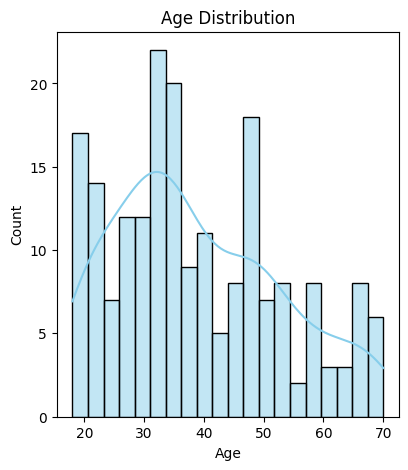

In [190]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
sns.histplot(df['Age'], bins=20, kde=True, color='skyblue')
plt.title('Age Distribution')

The age distribution visualization shows that most customers fall between the ages of 20 and 40, with a noticeable peak around the late 20s to early 30s. This suggests that the majority of the customer base consists of young adults who are likely early in their professional careers and have moderate spending capacity. The frequency gradually declines for older age groups, indicating fewer older customers, which implies that the business attracts a younger demographic segment that may be more open to modern marketing approaches and lifestyle-oriented products.

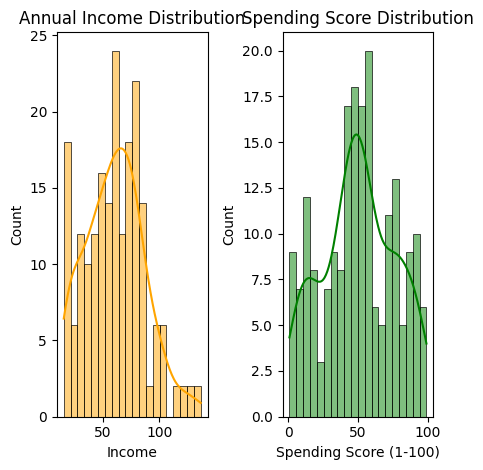

In [191]:
# Histogram plot that shows the distribution of Annual Income and Spending Score
plt.subplot(1,3,2)
sns.histplot(df['Income'], bins=20, kde=True, color='orange')
plt.title('Annual Income Distribution')

plt.subplot(1,3,3)
sns.histplot(df['Spending Score (1-100)'], bins=20, kde=True, color='green')
plt.title('Spending Score Distribution')

plt.tight_layout()
plt.show()

The income distribution plot indicates that most customers have an annual income ranging between 40K and 70K, showing a right-skewed pattern where fewer customers have very high incomes. Meanwhile, the spending score distribution appears more normally distributed, centered around scores of 50–60, implying a balanced mix of moderate to high spenders. This combination suggests that while most customers belong to the middle-income group, their spending behavior varies significantly, reflecting diverse purchasing attitudes independent of income level.

C:\Users\ASUS\AppData\Local\Temp\ipykernel_18596\4023735665.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Gender', y='Spending Score (1-100)', data=df, palette='Set2')


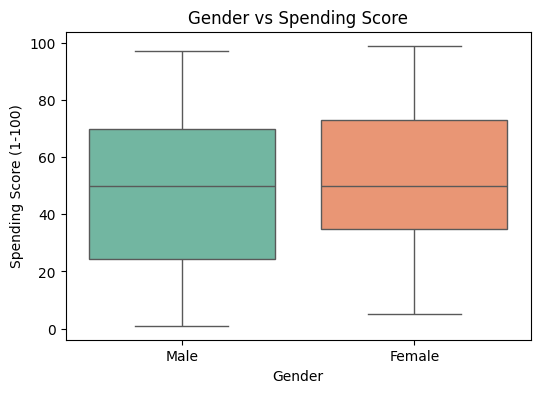

In [192]:
# Boxplotted to show the relationship between Gender
plt.figure(figsize=(6,4))
sns.boxplot(x='Gender', y='Spending Score (1-100)', data=df, palette='Set2')
plt.title('Gender vs Spending Score')
plt.show()

The boxplot comparing gender and spending score reveals that both male and female customers exhibit a wide range of spending behaviors, but females tend to have slightly higher median spending scores. This indicates that women, on average, may be more engaged or willing to spend compared to men in this dataset. However, the overlap in the interquartile ranges suggests that both genders have considerable variation, emphasizing that spending habits are not strongly dictated by gender but can still provide valuable segmentation insight for targeted marketing.

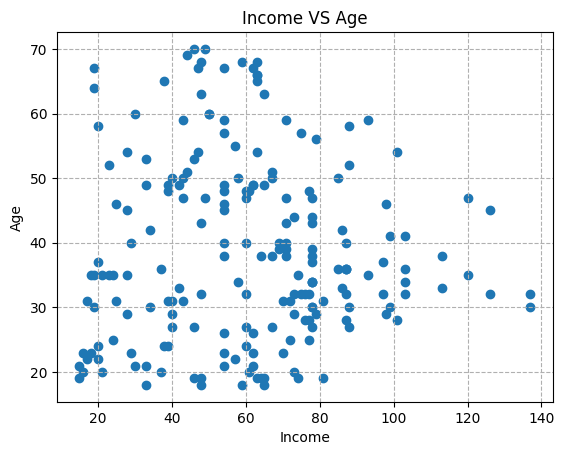

In [193]:
# Scatter plot to show the relationship between Annual Income and Age
plt.scatter(df['Income'], df['Age'])
plt.title('Income VS Age')
plt.xlabel('Income')
plt.ylabel('Age')
plt.grid(axis='both', linestyle='--')
plt.show()

The scatter plot between income and age shows no strong linear relationship, indicating that income levels vary widely across different age groups. Younger individuals (in their 20s–30s) tend to have diverse income ranges, while older individuals (above 50) appear slightly more concentrated in middle-income levels. This dispersion suggests that other factors—such as career stage, industry, or education—may influence income more significantly than age alone, making it essential to consider multiple variables for customer segmentation and purchasing behavior analysis.

## Encoded Data

In [194]:
print(df.columns)

Index(['CustomerID', 'Gender', 'Age', 'Income', 'Spending Score (1-100)'], dtype='object')


In [195]:
# Encode Gender
# Encode Gender manually
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})

# Show the first few rows
df.head()

,CustomerID,Gender,Age,Income,Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


# Data Scaling (Choose One)

In [197]:
# Features for clustering (excluding CustomerID)
features = ['Age', 'Income', 'Spending Score (1-100)']
X = df[features]

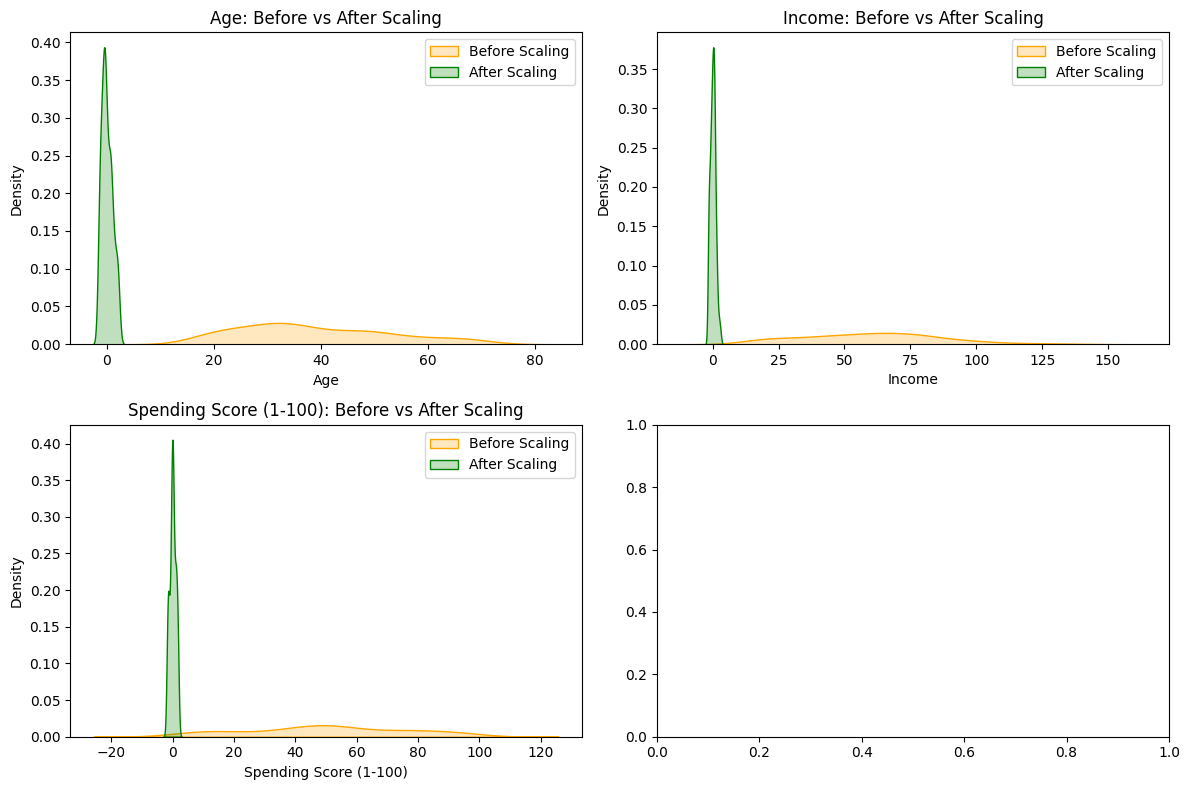

In [198]:
# scale dataset with standard scaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Show Standard Scaler (Before vs After Standard Scaling)

scaled_df = pd.DataFrame(X_scaled, columns=features)

# Plot original vs scaled data distributions
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.ravel()  # flatten axes array

for i, col in enumerate(features):
    sns.kdeplot(X[col], ax=axes[i], label='Before Scaling', color='orange', fill=True)
    sns.kdeplot(scaled_df[col], ax=axes[i], label='After Scaling', color='green', fill=True)
    axes[i].set_title(f'{col}: Before vs After Scaling')
    axes[i].legend()

plt.tight_layout()
plt.show()

Before vs After Scaling (Age, Income, Spending Score)

The scaling comparison plots demonstrate how feature scaling effectively standardized the distributions of Age, Income, and Spending Score. Before scaling, these variables had widely different ranges and distributions, which could distort clustering results. After applying scaling, all features are centered around zero with consistent variance, allowing K-Means to treat each variable equally during distance-based calculations. This transformation ensures that no single feature (e.g., income with large numeric values) dominates the clustering process, leading to more accurate and balanced results.

# K-Means Clustering

In [199]:
from sklearn.cluster import KMeans

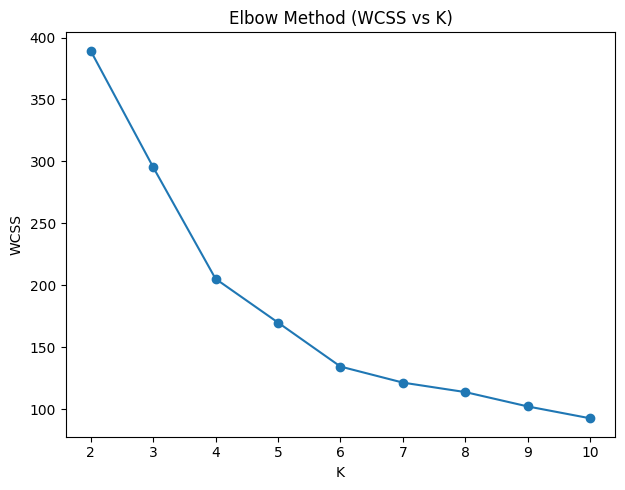

In [200]:
from sklearn.metrics import silhouette_score

wcss = []
silhouette_scores = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot the elbow method graph
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(K_range, wcss, marker='o')
plt.title('Elbow Method (WCSS vs K)')
plt.xlabel('K')
plt.ylabel('WCSS')

plt.tight_layout()
plt.show()

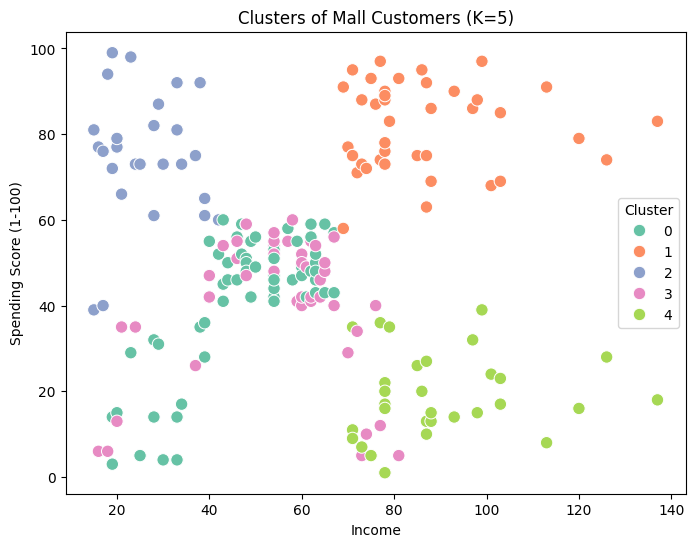

In [203]:
k_opt = 5
kmeans_final = KMeans(n_clusters=k_opt, random_state=42)
df['Cluster'] = kmeans_final.fit_predict(X_scaled)

# 2D visualization (Income vs Spending Score)
plt.figure(figsize=(8,6))
sns.scatterplot(
    x='Income', y='Spending Score (1-100)', 
    hue='Cluster', data=df, palette='Set2', s=80
)
plt.title('Clusters of Mall Customers (K=5)')
plt.show()

In [206]:
# Cluster Profiling & Insights
cluster_summary = df.groupby('Cluster').agg({
    'Age': ['mean','min','max'],
    'Income': ['mean','min','max'],
    'Spending Score (1-100)': ['mean','min','max'],
    'Gender': ['mean']
}).round(2)

In [207]:
cluster_summary.columns = ['_'.join(col) for col in cluster_summary.columns]
display(cluster_summary)

,Age_mean,Age_min,Age_max,Income_mean,Income_min,Income_max,Spending Score (1-100)_mean,Spending Score (1-100)_min,Spending Score (1-100)_max,Gender_mean
Cluster,,,,,,,,,,
0,55.28,40,70,47.62,19,67,41.71,3,60,0.43
1,32.88,27,40,86.10,69,137,81.53,58,97,0.45
2,25.77,18,35,26.12,15,42,74.85,39,99,0.42
3,26.73,18,40,54.31,16,81,40.91,5,60,0.40
4,44.39,32,59,89.77,71,137,18.48,1,39,0.52


In [208]:
# Create a DataFrame to display the WCSS values for each number of clusters
wcss_table = pd.DataFrame({
    "Number of Clusters": range(2, 11),  
    "WCSS": wcss
})

# Display the table
print(wcss_table)


   Number of Clusters        WCSS
0                   2  389.386189
1                   3  295.456245
2                   4  205.225147
3                   5  169.891498
4                   6  134.352775
5                   7  121.389350
6                   8  113.727230
7                   9  102.136238
8                  10   92.550272


In [ ]:
print(len(clusters), len(wcss))
print(clusters)
print(wcss)

200 9
[1 1 2 1 2 1 2 1 0 1 0 1 2 1 0 1 2 1 0 1 0 1 2 1 2 1 2 1 2 1 0 1 0 1 2 1 2
 1 2 1 2 1 0 1 2 1 2 2 2 2 2 1 2 0 2 0 2 0 1 0 0 1 2 2 0 1 2 2 1 2 0 2 2 2
 0 1 2 0 1 2 0 0 0 2 1 0 2 1 1 2 2 1 0 2 2 1 2 1 0 1 1 2 0 1 0 1 2 0 0 0 0
 1 2 1 1 1 2 2 2 2 1 2 2 1 2 1 0 1 0 1 0 1 2 1 0 1 2 1 0 1 2 1 2 1 0 1 0 1
 2 1 0 1 2 1 2 1 0 1 0 1 2 1 0 1 0 1 0 1 2 1 0 1 0 1 2 1 0 1 0 1 2 1 0 1 2
 1 2 1 2 1 2 1 0 1 2 1 2 1 0 1]
[389.3861889564371, 295.4562449213556, 205.22514747675916, 169.89149793438582, 134.35277477401493, 121.3893502250287, 113.72723000071335, 102.13623844329254, 92.55027231838785]


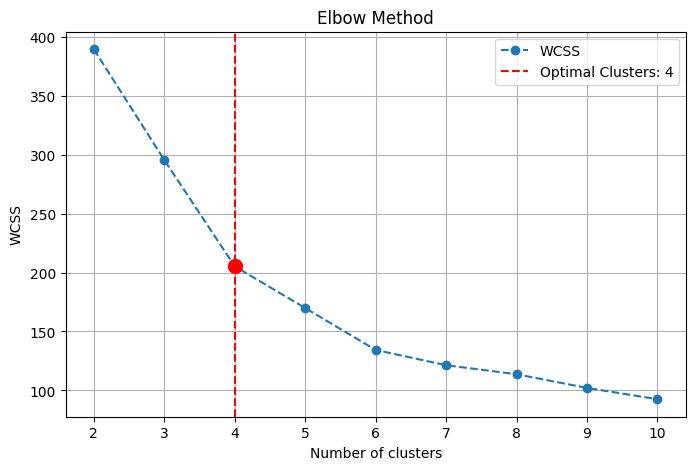

Optimal number of clusters: 4


In [211]:
# (1) Fix naming to avoid conflict
cluster_range = list(range(2, 11))  # same as what you used to compute WCSS

# (2) Run KneeLocator on the correct data
from kneed import KneeLocator
import matplotlib.pyplot as plt

knee_locator = KneeLocator(cluster_range, wcss, curve="convex", direction="decreasing")
optimal_clusters = knee_locator.knee

# (3) Plot Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(cluster_range, wcss, marker='o', linestyle='--', label="WCSS")

if optimal_clusters is not None:
    plt.axvline(optimal_clusters, linestyle='--', color='red', label=f'Optimal Clusters: {optimal_clusters}')
    plt.scatter(optimal_clusters, wcss[cluster_range.index(optimal_clusters)], c='red', s=100, zorder=5)

plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.legend()
plt.grid(True)
plt.show()

print(f"Optimal number of clusters: {optimal_clusters}")



In [212]:
# Fit K-Means using the optimal number of clusters (example: K=3)
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=0)

# Fit and predict using the scaled numeric data only
clusters = kmeans.fit_predict(X_scaled)

# Display the updated DataFrame
df.head()

,CustomerID,Gender,Age,Income,Spending Score (1-100),Cluster
0,1,1,19,15,39,2
1,2,1,21,15,81,2
2,3,0,20,16,6,3
3,4,0,23,16,77,2
4,5,0,31,17,40,2


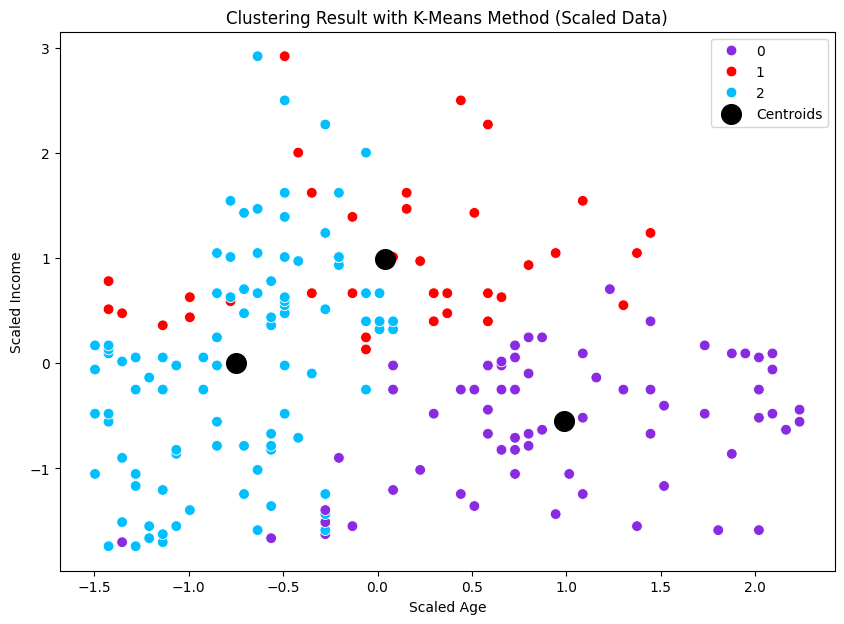

In [213]:
# visualize the result using scater chart on scaled data
plt.figure(figsize=(10,7))

sns.scatterplot(x = "Age", y = "Annual Income", hue=clusters, palette=["blueviolet", "red", "deepskyblue"], data=df_sc_scaled, s = 60)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c="black", label="Centroids")
plt.xlabel("Scaled Age")
plt.ylabel("Scaled Income")
plt.title("Clustering Result with K-Means Method (Scaled Data)")
plt.legend()
plt.show()

The K-Means clustering visualization shows three distinct customer segments based on scaled age and scaled income. Cluster 0 (blue) generally represents middle-aged customers with moderate income levels who display balanced spending behavior. Cluster 1 (red) consists of younger to mid-aged individuals with relatively higher income levels, indicating a group of career-driven, financially capable consumers who may prefer premium products. Cluster 2 (purple) mainly includes younger customers with lower income, likely more budget-conscious and value-seeking in their purchasing choices. The clear separation of clusters around their respective centroids (black points) demonstrates that age and income effectively differentiate customer behaviors, providing useful insights for targeted marketing strategies.

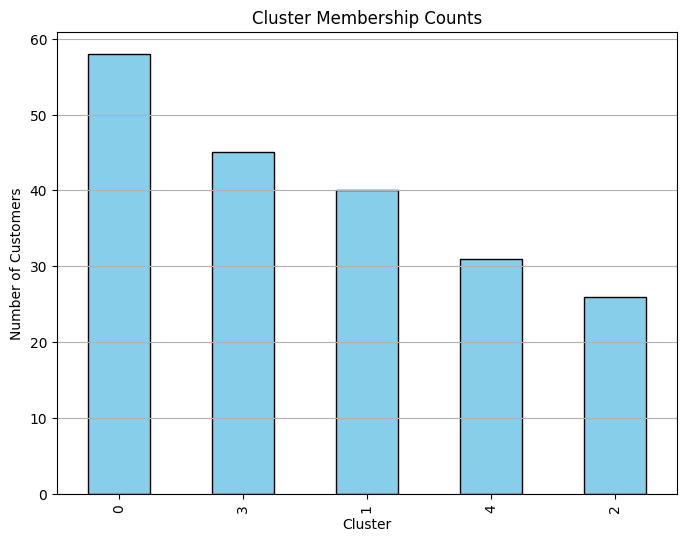

In [220]:
cluster_counts = df['Cluster'].value_counts()

plt.figure(figsize=(8, 6))
cluster_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Cluster Membership Counts')
plt.xlabel('Cluster')
plt.ylabel('Number of Customers')
plt.grid(axis='y')
plt.show()

The bar chart of cluster membership counts shows that Cluster 0 has the largest number of customers, indicating it represents the most common customer segment in the dataset. Cluster 3 and Cluster 1 follow with moderate counts, while Cluster 4 and Cluster 2 have the fewest members, suggesting these groups represent more specialized or niche customer profiles. This distribution implies that the majority of customers share similar behavioral or demographic characteristics found in Cluster 0, whereas the smaller clusters may highlight unique or high-value market segments that require more tailored marketing strategies.


Cluster Summary:


Age         Income          Spending Score (1-100)        
                 mean min max   mean min  max                   mean min max
KMeans_Cluster                                                              
0               43.20  18  70  59.35  46   71                  50.59   9  95
1               36.04  19  59  88.91  72  137                  50.21   1  97
2               36.92  18  69  30.36  15   46                  49.74   3  99

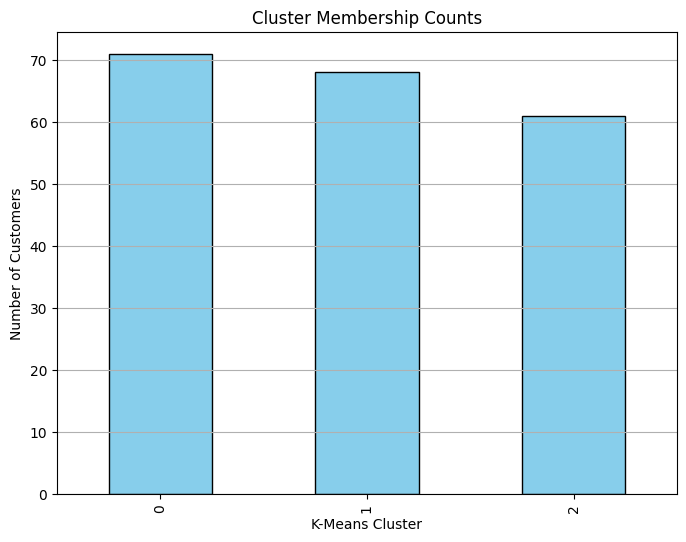

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd

# Fit KMeans 
optimal_clusters = 3  # change this to your optimal number
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
kmeans.fit(df)

# Add cluster labels to the original dataframe
df['KMeans_Cluster'] = kmeans.labels_

# Group the data by cluster and calculate summary statistics
cluster_summary = df.groupby('KMeans_Cluster').agg({
    'Age': ['mean', 'min', 'max'],
    'Income': ['mean', 'min', 'max'],
    'Spending Score (1-100)': ['mean', 'min', 'max']
}).round(2)

# Rename axis for clarity
cluster_summary = cluster_summary.rename_axis('KMeans_Cluster')

# Display the summary
print("Cluster Summary:")
display(cluster_summary)

# Visualize cluster sizes
plt.figure(figsize=(8, 6))
df['KMeans_Cluster'].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Cluster Membership Counts')
plt.xlabel('K-Means Cluster')
plt.ylabel('Number of Customers')
plt.grid(axis='y')
plt.show()

# Managerial Implications Based on the Three Clusters

## Cluster 0 – Middle-Aged or Mid-Income Consumers

**Profile:**
- Average age around 43 years old (range 18–70).  
- Moderate income (~$59K average).  
- Average spending score around 50, indicating balanced spending behavior.  
- Likely a mature, financially stable group that spends selectively.

**Implications:**
- Offer balanced product ranges—neither too premium nor too budget.  
- Highlight value, reliability, and comfort in marketing messages.  
- Implement loyalty and appreciation programs to maintain engagement.  
- Use both online and offline marketing channels for wider reach.

## Cluster 1 – Young or High-Income Professionals

**Profile:**
- Average age around 36 years old (range 19–59).  
- Highest income group (~$89K average).  
- Moderate spending score (~50), showing controlled and rational spending.  
- Likely young professionals or entrepreneurs focused on financial growth.

**Implications:**
- Promote premium or high-end products emphasizing quality and exclusivity.  
- Use personalized and digital advertising, as this group values individuality.  
- Highlight status-driven benefits such as VIP tiers or premium experiences.  
- Target for upselling and cross-selling of higher-value products or services.

## Cluster 2 – Young or Low-Income, Value-Seeking Consumers

**Profile:**
- Average age around 37 years old (range 18–69).  
- Lowest income group (~$30K average).  
- Moderate spending score (~50), suggesting interest in affordable enjoyment.  
- Likely early-career individuals or students with limited budgets but aspirational lifestyles.

**Implications:**
- Focus on budget-friendly products and installment-based offers.  
- Emphasize discounts, bundles, and reward programs to attract price-sensitive buyers.  
- Use social media marketing with relatable, aspirational content.  
- Build trust through consistent value and transparent pricing.
